### 1. Acquire data from the cloud database.
You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.
Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value

In [6]:
#imports
import pandas as pd
import numpy as np
import env
import os
import wrangle
import wrangle_mall
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [9]:
#acquire file
df = wrangle.wrangle_zillow()

Acquiring data from server


In [12]:
df.head()

,parcelid,airconditioningtypeid,airconditioningdesc,architecturalstyletypeid,architecturalstyledesc,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingclassdesc,buildingqualitytypeid,...,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate
0,14297519,NaN,None,NaN,None,3.5,4.0,NaN,None,NaN,...,1998.0,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01
1,17052889,NaN,None,NaN,None,1.0,2.0,NaN,None,NaN,...,1967.0,1.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01
2,14186244,NaN,None,NaN,None,2.0,3.0,NaN,None,NaN,...,1962.0,1.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01
3,12177905,NaN,None,NaN,None,3.0,4.0,NaN,None,8.0,...,1970.0,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01
4,10887214,1.0,Central,NaN,None,3.0,3.0,NaN,None,8.0,...,1964.0,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01


#### 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77380 entries, 0 to 77379
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77380 non-null  int64  
 1   airconditioningtypeid         24953 non-null  float64
 2   airconditioningdesc           24953 non-null  object 
 3   architecturalstyletypeid      206 non-null    float64
 4   architecturalstyledesc        206 non-null    object 
 5   bathroomcnt                   77380 non-null  float64
 6   bedroomcnt                    77380 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingclassdesc             15 non-null     object 
 9   buildingqualitytypeid         49671 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  calculatedfinishedsquarefeet  77184 non-null  float64
 12  fips                          77380 non-null  float64
 13  f

In [14]:
df.shape

(77380, 46)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,77380.0,1.300715e+07,3.481368e+06,1.071186e+07,1.153830e+07,1.253155e+07,1.421184e+07,1.676893e+08
airconditioningtypeid,24953.0,1.813289e+00,2.967894e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,206.0,7.388350e+00,2.734542e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
bathroomcnt,77380.0,2.299134e+00,9.966566e-01,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
bedroomcnt,77380.0,3.053489e+00,1.139103e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
buildingqualitytypeid,49671.0,6.534638e+00,1.721933e+00,1.000000e+00,6.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
decktypeid,614.0,6.600000e+01,0.000000e+00,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01
calculatedfinishedsquarefeet,77184.0,1.785229e+03,9.540518e+02,1.280000e+02,1.182000e+03,1.543000e+03,2.113000e+03,3.564000e+04
fips,77380.0,6.048819e+03,2.074829e+01,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03


In [16]:
categorical_col = [col for col in df.columns if col in df.select_dtypes(include = ["object"])]
for col in categorical_col:
    print("column name :",  col)
    print(df[col].value_counts())
    print()

column name : airconditioningdesc
Central          23133
Yes               1574
None               167
Wall Unit           53
Refrigeration       26
Name: airconditioningdesc, dtype: int64

column name : architecturalstyledesc
Contemporary     172
Conventional      19
Ranch/Rambler      7
Bungalow           5
Cape Cod           3
Name: architecturalstyledesc, dtype: int64

column name : buildingclassdesc
Buildings having wood or wood and steel frames                                                                                                                                                                                             14
Buildings having exterior walls built of a non-combustible material such as brick, concrete, block or poured concrete. Interior partitions and roof structures are built of combustible materials. Floor may be concrete or wood frame.     1
Name: buildingclassdesc, dtype: int64

column name : propertycountylandusecode
0100    26713
122     13045
010C     

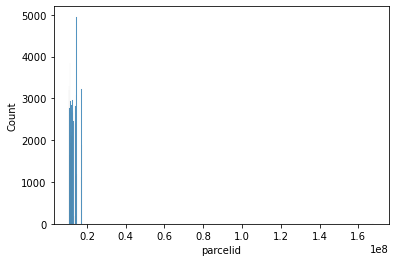

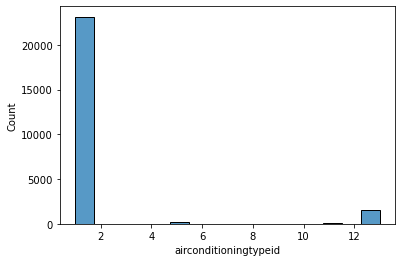

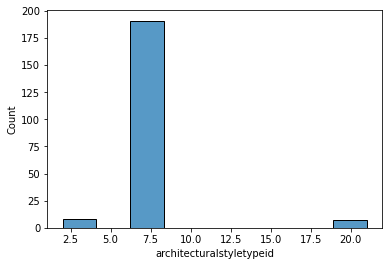

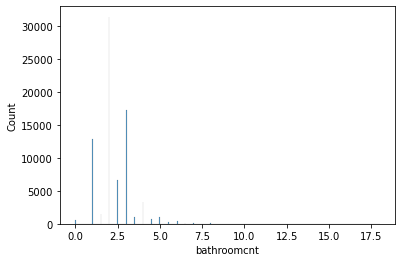

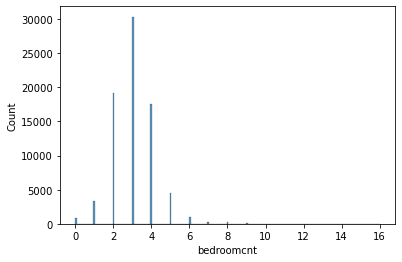

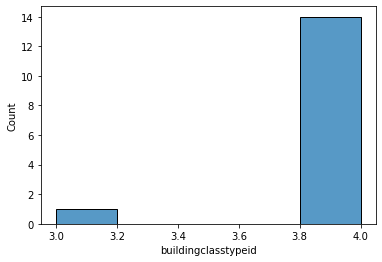

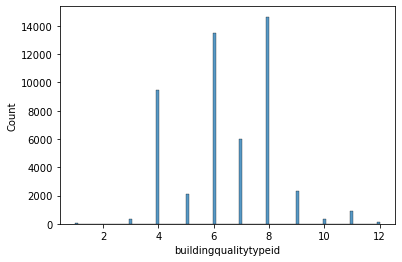

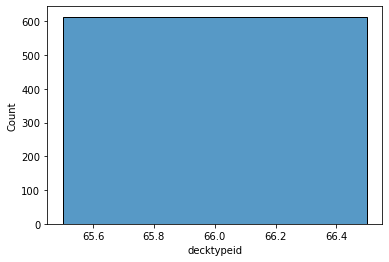

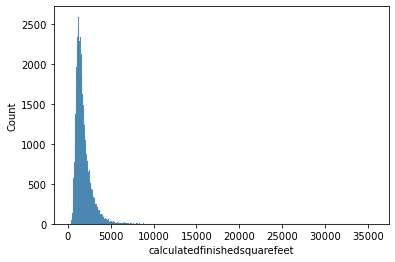

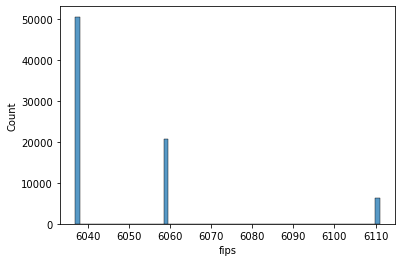

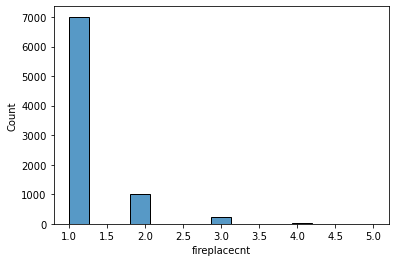

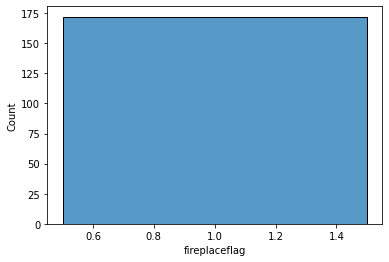

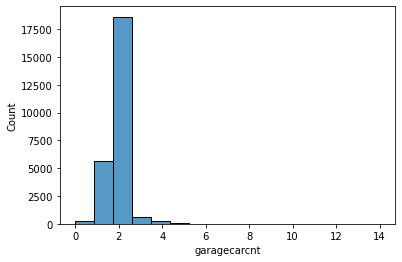

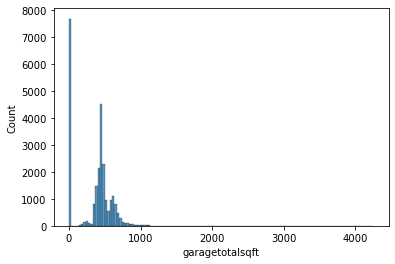

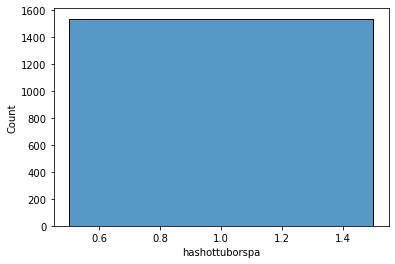

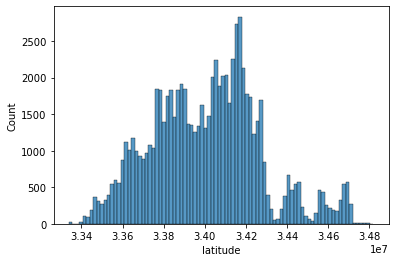

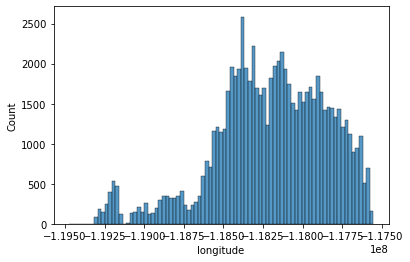

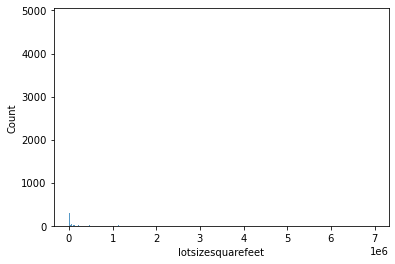

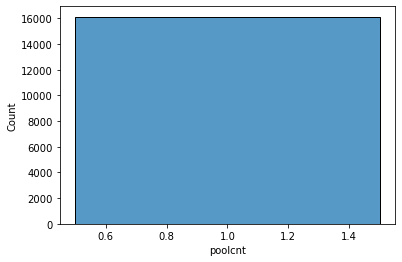

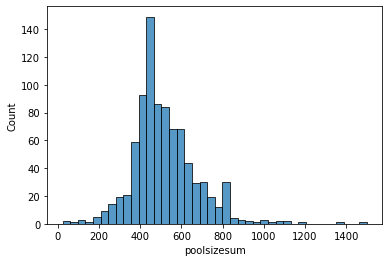

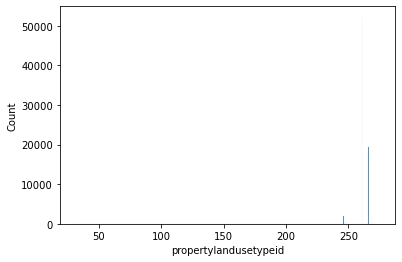

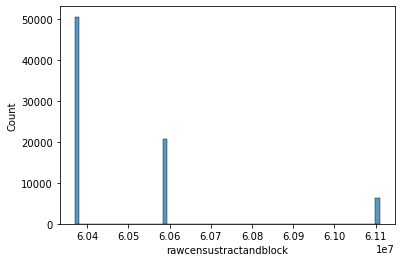

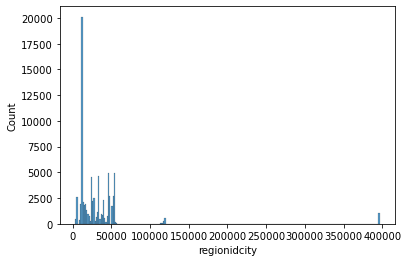

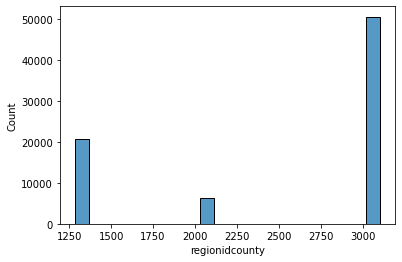

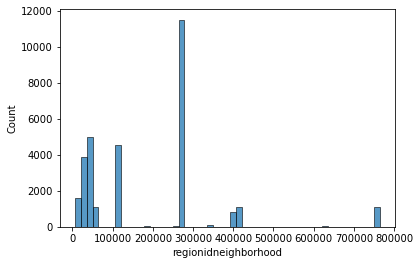

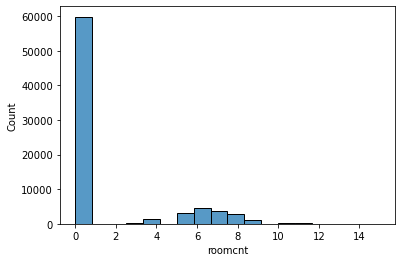

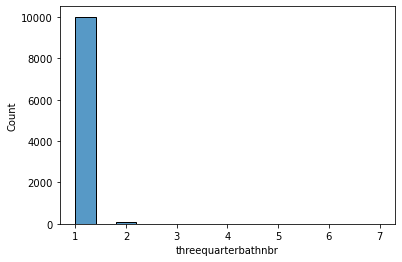

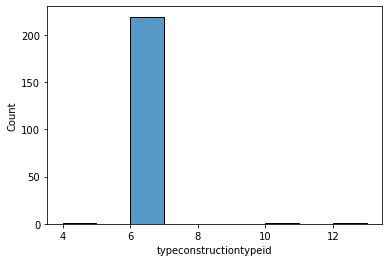

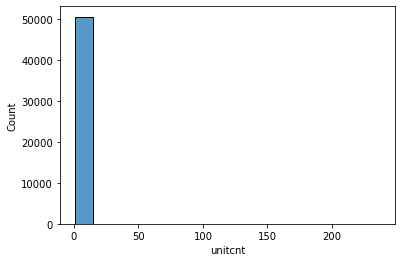

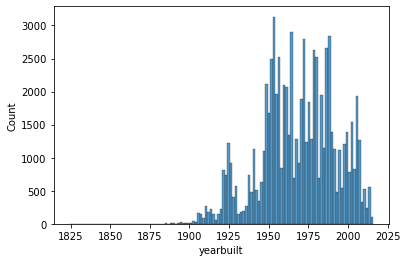

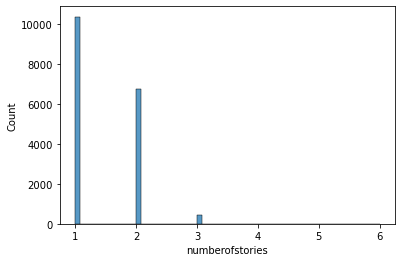

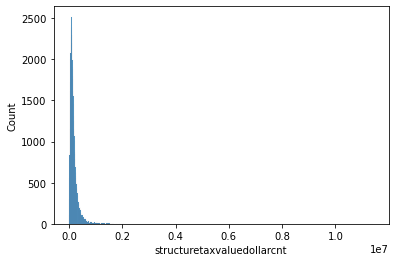

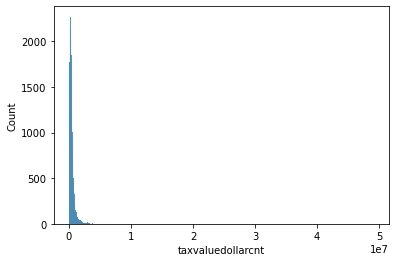

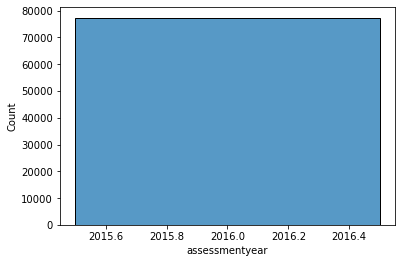

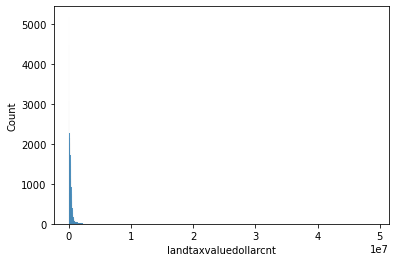

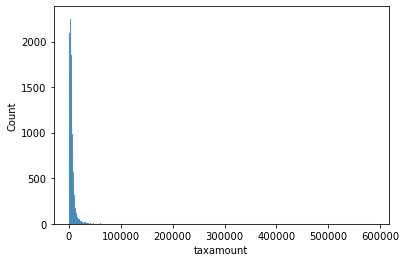

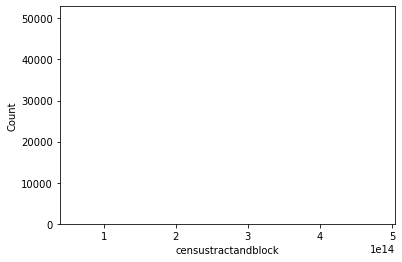

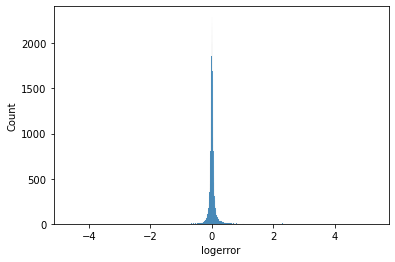

In [17]:

numerical_columns = [col for col in df.columns if col in df.select_dtypes(include = ["number"])]
for col in numerical_columns:
    sns.histplot(df[col])
    plt.show()


#### 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [18]:
def nulls_by_col(df):
    num_rows_missing = df.isnull().sum()
    pct_rows_missing = df.isnull().sum() / df.shape[0] * 100
    cols_missing = pd.DataFrame({
        "num_rows_missing" : num_rows_missing ,
        " pct_rows_missing" : pct_rows_missing
    })
    return cols_missing

In [19]:
nulls_by_col(df)

,num_rows_missing,pct_rows_missing
parcelid,0,0.000000
airconditioningtypeid,52427,67.752649
airconditioningdesc,52427,67.752649
architecturalstyletypeid,77174,99.733781
architecturalstyledesc,77174,99.733781
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
buildingclasstypeid,77365,99.980615
buildingclassdesc,77365,99.980615
buildingqualitytypeid,27709,35.808995


In [ ]:
#some columns have really high number of nulls

### Prepare

#### 1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [22]:
df.propertylandusedesc.value_counts(dropna = False).to_frame()


,propertylandusedesc
Single Family Residential,52319
Condominium,19294
"Duplex (2 Units, Any Combination)",2009
Planned Unit Development,1944
"Quadruplex (4 Units, Any Combination)",727
"Triplex (3 Units, Any Combination)",535
Cluster Home,333
Mobile Home,74
"Manufactured, Modular, Prefabricated Homes",58
Residential General,37


## Mall Customers

### 1. Acquire data from the customers table in the mall_customers database.

In [ ]:
mall = wrangle_mall.get_mall_data()

In [ ]:
mall.head()

### 2. Summarize the data (include distributions and descriptive statistics)

In [ ]:
mall.select_dtypes(include = ['int64']).head()

In [ ]:
def summary_mall_data(df):
    print("dataframe head")
    print()
    print(df.head())
    print()
    print("dataframe info")
    print()
    print(df.info())
    print()
    print("describe dataframe")
    print()
    print(df.describe().T)
    print()
    numerical_col = [col for col in df.columns if col in df.select_dtypes(include = ["number"])]
    categorical_col = [col for col in df.columns if col in df.select_dtypes(include = ["object"])]
    for col in df.columns:
        print("column name:", col)
        if col in categorical_col:
            print (df[col].value_counts())
            print()
        else:
            print (df[col].value_counts(bins = 10))
            print()

In [ ]:
summary_mall_data(mall)